<a href="https://colab.research.google.com/github/pj0620/google-colab-notebooks/blob/main/random_sampling_estimate_total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-50-5b8560b7eef0>:49: RuntimeWarning: invalid value encountered in divide
  ax3.plot(X_scaled, P / trueP, label="qout_percent")


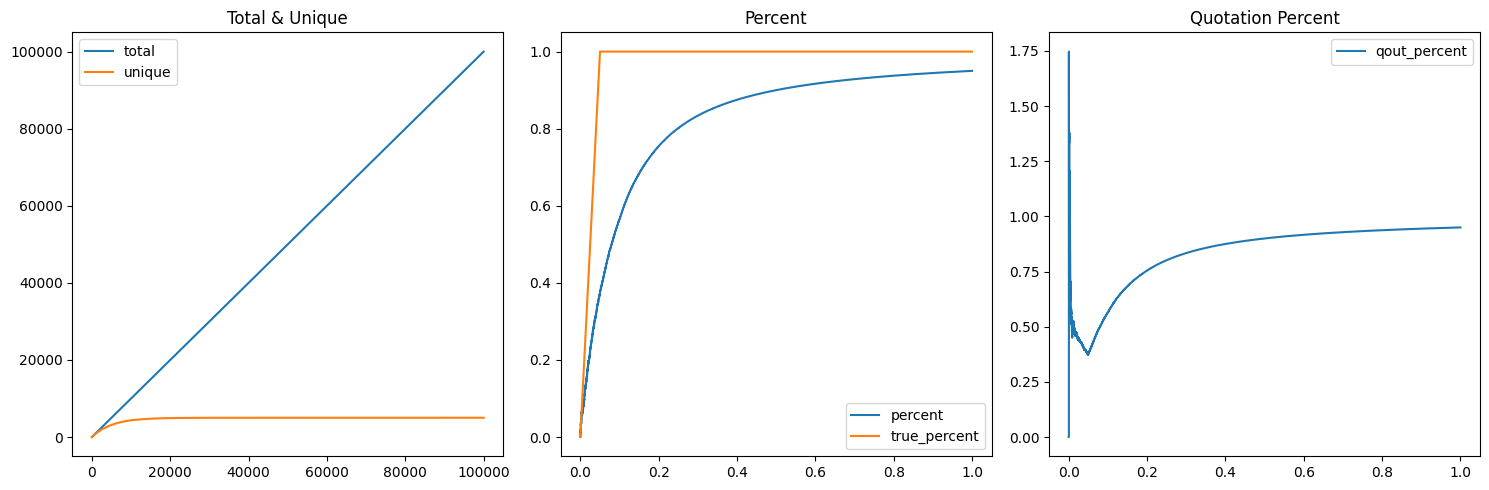

In [50]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np

NUM_DATA_POINTS = 100000
N = 5000

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')


def get_number(): return randint(0, N-1)

seen = set()
running_total_new = 0
total_seen = []

for x in range(NUM_DATA_POINTS):
  num = get_number()

  if num not in seen:
    seen.add(num)
    running_total_new += 1

  total_seen.append(running_total_new)

X = np.arange(1, NUM_DATA_POINTS + 1)
total_seen = np.array(total_seen)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

ax1.plot(X, X, label="total")
ax1.plot(X, total_seen, label="unique")
ax1.legend()
ax1.set_title("Total & Unique")

# Plot "percent" on ax2
P = 1 - total_seen / X
X_scaled = X / NUM_DATA_POINTS
ax2.plot(X_scaled, P, label="percent")

trueP = np.concatenate([np.arange(0, N + 1), N * np.ones((NUM_DATA_POINTS - N - 1,))]) / N

ax2.plot(X_scaled, trueP, label="true_percent")
ax2.plot()
ax2.legend()
ax2.set_title("Percent")

ax3.plot(X_scaled, P / trueP, label="qout_percent")
ax3.plot()
ax3.legend()
ax3.set_title("Quotation Percent")

plt.tight_layout()
plt.show()
